In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("df_98039_new.csv")

In [3]:
df.describe()

,sqft_living,price
count,50.0000,5.000000e+01
mean,3800.9000,2.160607e+06
std,1764.5025,1.166477e+06
min,1220.0000,7.875000e+05
25%,2680.0000,1.401000e+06
50%,3560.0000,1.892500e+06
75%,4452.5000,2.556250e+06
max,9890.0000,6.885000e+06


In [5]:
x = df["sqft_living"]
y = df["price"]
m = len(x)                                    # number of data entry

In [6]:
def h(x, a0, a1):                             # hypothesis
    h = a0 + a1*x
    return h
def J(a0, a1, x, y, m):                       #cost function
    j = 0
    for i in range (m):
        j += (h(x[i], a0, a1) - y[i]) ** 2
    return j/(2*m)
def gradJ(a0, a1, x, y, m):                    # gradient of cost function
    Dja0 = 0 
    Dja1 = 0
    for i in range (m):
        Dja0 += (h(x[i],a0,a1) - y[i])
        Dja1 += (h(x[i],a0,a1) - y[i]) * x[i]
    gradJ = [Dja0/m, Dja1/m]
    return gradJ
def ap1(a0, a1, gJ, alpha):                    # updating the theta values
    a0p1 = a0 - alpha * gJ[0]
    a1p1 = a1 - alpha * gJ[1]
    ap1 = [a0p1, a1p1]
    return ap1


-0.16721110266192546 0.6140302606695959


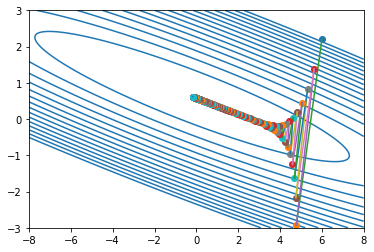

In [7]:
fig, ax = plt.subplots()
p0 = np.linspace(-8,8, 500)
p1 = np.linspace(-3,3, 500)
pa0, pa1 = np.meshgrid(p0, p1)      #The numpy.meshgrid function is used to create a rectangular grid out of 
                                    #two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing. 

ax.contour(pa0,pa1,J(pa0,pa1,x/1000,y/1000000,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,5)])
# levels : int or array-like, optional Determines the number and positions of the contour lines / regions.
a0 = 6
a1 = 2.2
ax.plot(a0,a1, 'o')

for i in range(300):
    a0old, a1old = a0, a1
    a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x/1000,y/1000000,m), alpha=0.1 )
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1], '-')
    

print(a0,a1)

In [8]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

x_new = (x - x_mean) / x_std           #mean Normalization
y_new = (y - y_mean) / y_std

-1 4
-0.4999999999999999 2.5010345733150263
-0.24999999999999983 1.736562205705689
-0.12499999999999996 1.3466812982249272
-0.0625 1.1478420354097387
-0.031250000000000014 1.0464340113739925
-0.01562500000000002 0.9947159191157618
-0.007812500000000045 0.9683396920640642
-0.00390625000000005 0.9548878162676984
-0.0019531250000000572 0.9480273596115518
-0.0009765625000000447 0.944528526716917


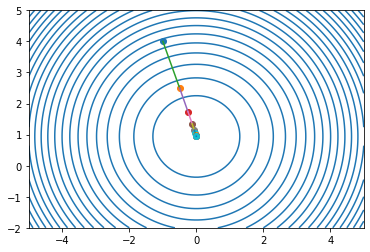

In [9]:
def plot_steps( startpt=[-1,4], alpha=.5, nsteps=10) :     # to draw contour plots and current value of theta
    fig, ax = plt.subplots()
    # setup the contour axis
    p0 = np.linspace(-5,5, 100)
    p1 = np.linspace(-2,5, 100)
    pa0, pa1 = np.meshgrid(p0, p1)

    # plot the Cost function J
    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80,.9)])

    # starting point
    #a0 = -1; a1 = 4
    a0 = startpt[0]; a1 = startpt[1]
    ax.plot(a0,a1, 'o')
    print(a0,a1)

    # do the gradient descent loop and plot the progress
    for i in range(nsteps):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha)
        print(a0,a1) # the updated parameters
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-') # connect the dots
        
plot_steps( startpt=[-1,4], alpha=.5, nsteps=10)

In [10]:
'''def plot_s(start, alpha, epoch):
    fig, ax = plt.subplots()
    p0 = np.linspace(-8,8, 500)
    p1 = np.linspace(-3,3, 500)
    pa0, pa1 = np.meshgrid(p0, p1)

    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80, 0.9)])

    a0 = start[0]
    a1 = start[1]
    ax.plot(a0,a1, 'o')

    for i in range(epoch):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha )
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-')'''

# corrrected code above

#print(a0,a1)

"def plot_s(start, alpha, epoch):\n    fig, ax = plt.subplots()\n    p0 = np.linspace(-8,8, 500)\n    p1 = np.linspace(-3,3, 500)\n    pa0, pa1 = np.meshgrid(p0, p1)\n\n    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80, 0.9)])\n\n    a0 = start[0]\n    a1 = start[1]\n    ax.plot(a0,a1, 'o')\n\n    for i in range(epoch):\n        a0old, a1old = a0, a1\n        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha )\n        ax.plot(a0,a1,'o')\n        ax.plot([a0old,a0],[a1old,a1], '-')"

-1 4
-0.4999999999999999 2.5010345733150263
-0.24999999999999983 1.736562205705689
-0.12499999999999996 1.3466812982249272
-0.0625 1.1478420354097387
-0.031250000000000014 1.0464340113739925
-0.01562500000000002 0.9947159191157618
-0.007812500000000045 0.9683396920640642
-0.00390625000000005 0.9548878162676984
-0.0019531250000000572 0.9480273596115518
-0.0009765625000000447 0.944528526716917


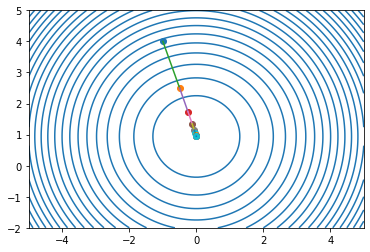

In [12]:
plot_steps([-1, 4], 0.5, 10)

In [13]:
a0, a1

(-0.16721110266192546, 0.6140302606695959)

In [14]:
def plot_graph(x, y, a0, a1):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o', label = "traning data")
    ax.plot(x, h(x_new, a0, a1), label = "h(x) = %.2f + %.2f * x" %(a0, a1))
    plt.legend()

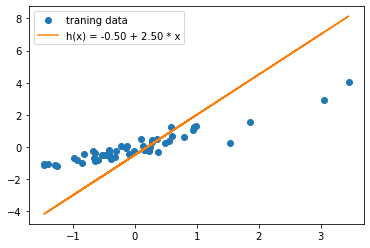

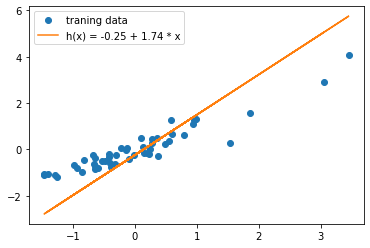

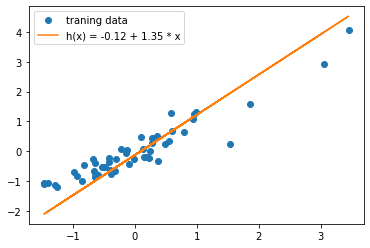

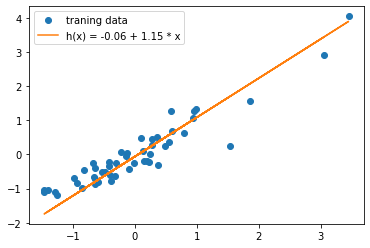

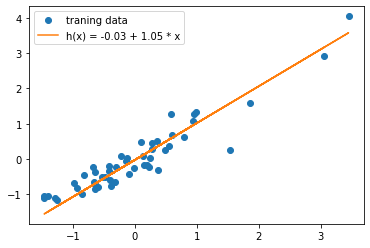

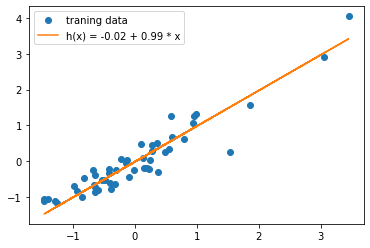

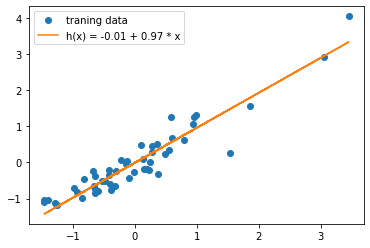

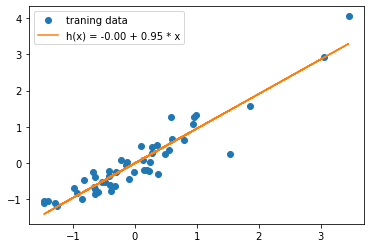

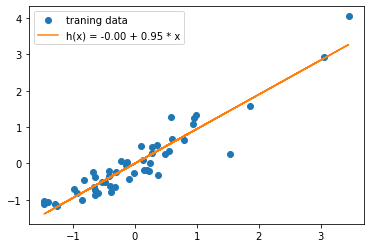

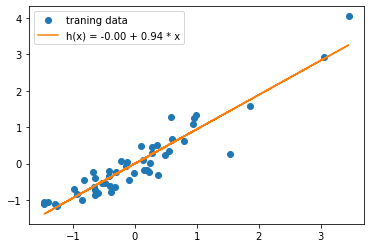

In [15]:
a0 = -1 
a1 = 4
for i in range (10) :
    a0, a1 = ap1(a0, a1, gJ = gradJ(a0, a1, x_new, y_new, m), alpha = 0.5)
    plot_graph(x_new, y_new, a0, a1)

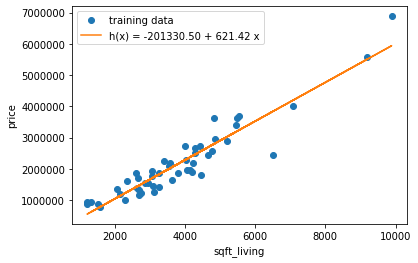

In [30]:
a0 = 0; a1 = 0.94
b1 = y_std/x_std * a1
b0 = y_std * a0 - b1*x_mean + y_mean

fig, ax = plt.subplots()
ax.plot(x,y, 'o', label='training data')
ax.plot(x, b0 + b1*x, label='h(x) = %.2f + %.2f x' %(b0, b1))
ax.set_xlabel('sqft_living')
ax.set_ylabel('price')
plt.legend();

**back transformation of parameters**
$$ x' = \frac{x - \overline x }{\sigma_x}, \quad y = \sigma_y y' + \overline y $$

$$ h(x) =  \sigma_y \left(a_0 + a_1 \left( \frac{x - \overline x }{\sigma_x} \right) \right) + \overline y$$ 

In [23]:
def predict(x, a0, a1) :
    pre = y_std * (a0 + a1 * (x - x_mean)/x_std) + y_mean
    return pre

In [24]:
a0 = 0
a1 = 0.94
predict(8000, a0, a1)

4769991.234451019